# Tugas Pra Uas

## 1. Data Set

https://archive.ics.uci.edu/dataset/14/breast+cancer

Dataset **Breast Cancer (Original)** dari UCI Machine Learning Repository merupakan kumpulan data klinis yang digunakan untuk memprediksi apakah seorang pasien kanker payudara akan mengalami kekambuhan (recurrence) atau tidak setelah perawatan. Dataset ini terdiri dari 286 entri dengan 10 atribut yang semuanya bersifat kategorikal.

Atribut pertama adalah `Class`, yang merupakan variabel target atau label klasifikasi. Nilainya terbagi menjadi dua kategori, yaitu `no-recurrence-events` yang menunjukkan pasien tidak mengalami kekambuhan, dan `recurrence-events` yang menunjukkan adanya kekambuhan penyakit. Atribut `age` menunjukkan kelompok usia pasien dalam interval, seperti `20-29`, `30-39`, hingga `70-79`. Selanjutnya, `menopause` menjelaskan status menopause pasien saat diagnosis, dengan nilai seperti `lt40` (kurang dari 40 tahun), `ge40` (40 tahun ke atas), atau `premeno` (sebelum menopause).

Atribut `tumor-size` mencerminkan ukuran tumor yang ditemukan, dibagi dalam rentang ukuran seperti `0-4`, `5-9`, hingga `50-54`. `inv-nodes` merujuk pada jumlah kelenjar getah bening axillary yang terlibat, dengan nilai seperti `0-2`, `3-5`, atau `6-8`. Fitur `node-caps` menunjukkan apakah terdapat kapsul pada node limfa (`yes`, `no`, atau `?` untuk data yang hilang). Sementara itu, `deg-malig` menggambarkan derajat keganasan tumor dan merupakan satu-satunya fitur numerik dengan nilai `1`, `2`, atau `3` (semakin tinggi, semakin ganas).

Fitur `breast` mengindikasikan sisi payudara yang terdampak (`left` atau `right`), dan `breast-quad` menunjukkan kuadran lokasi tumor dalam payudara seperti `left-up`, `right-low`, atau `central`. Terakhir, `irradiat` menyatakan apakah pasien menerima terapi radiasi (`yes` atau `no`). Dataset ini sangat berguna untuk tugas klasifikasi dan pembelajaran mesin dalam bidang kesehatan, khususnya dalam mempelajari faktor-faktor yang berkontribusi terhadap kekambuhan kanker payudara.


In [1]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

## data (as pandas dataframes)
data = breast_cancer.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("breast_cancer.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  r

## Eksplorasi

In [5]:
display(data) #display dataset

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events


### Deteksi Outlier

In [6]:
import pandas as pd
import numpy as np

# 2. Encode kategorik ke numerik agar bisa dianalisis untuk outlier
for col in data.columns:
    data[col] = pd.factorize(data[col])[0]

# 3. Deteksi outlier dengan metode IQR
def detect_outliers_iqr(df):
    outlier_dict = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = len(outliers)
    return outlier_dict

# 4. Cek hasil
outliers = detect_outliers_iqr(data)
print("Jumlah outlier per kolom (berdasarkan IQR):")
print(outliers)


Jumlah outlier per kolom (berdasarkan IQR):
{'age': 0, 'menopause': 0, 'tumor-size': 0, 'inv-nodes': 46, 'node-caps': 64, 'deg-malig': 0, 'breast': 0, 'breast-quad': 0, 'irradiat': 68, 'Class': 0}


### deteksi Missing Value

In [21]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
                    Class    age menopause tumor-size inv-nodes node-caps  \
145  no-recurrence-events  40-49   premeno      25-29       0-2      <NA>   
163  no-recurrence-events  60-69      ge40      25-29       3-5      <NA>   
164  no-recurrence-events  60-69      ge40      25-29       3-5      <NA>   
183  no-recurrence-events  50-59      ge40      30-34      9-11      <NA>   
184  no-recurrence-events  50-59      ge40      30-34      9-11      <NA>   
206     recurrence-events  50-59      ge40      30-34       0-2        no   
233     recurrence-events  70-79      ge40      15-19      9-11      <NA>   
263     recurrence-events  50-59      lt40      20-24       0-2      <NA>   
264     recurrence-events  50-59      lt40      20-24       0-2      <NA>   

     deg-malig breast breast-quad irradiat  
145          2   left   right_low      yes  
163          1  right     left_up      yes  
164          1  right    left_low      yes  
183          3   left  

### Visualisasi

<Figure size 1200x1000 with 0 Axes>

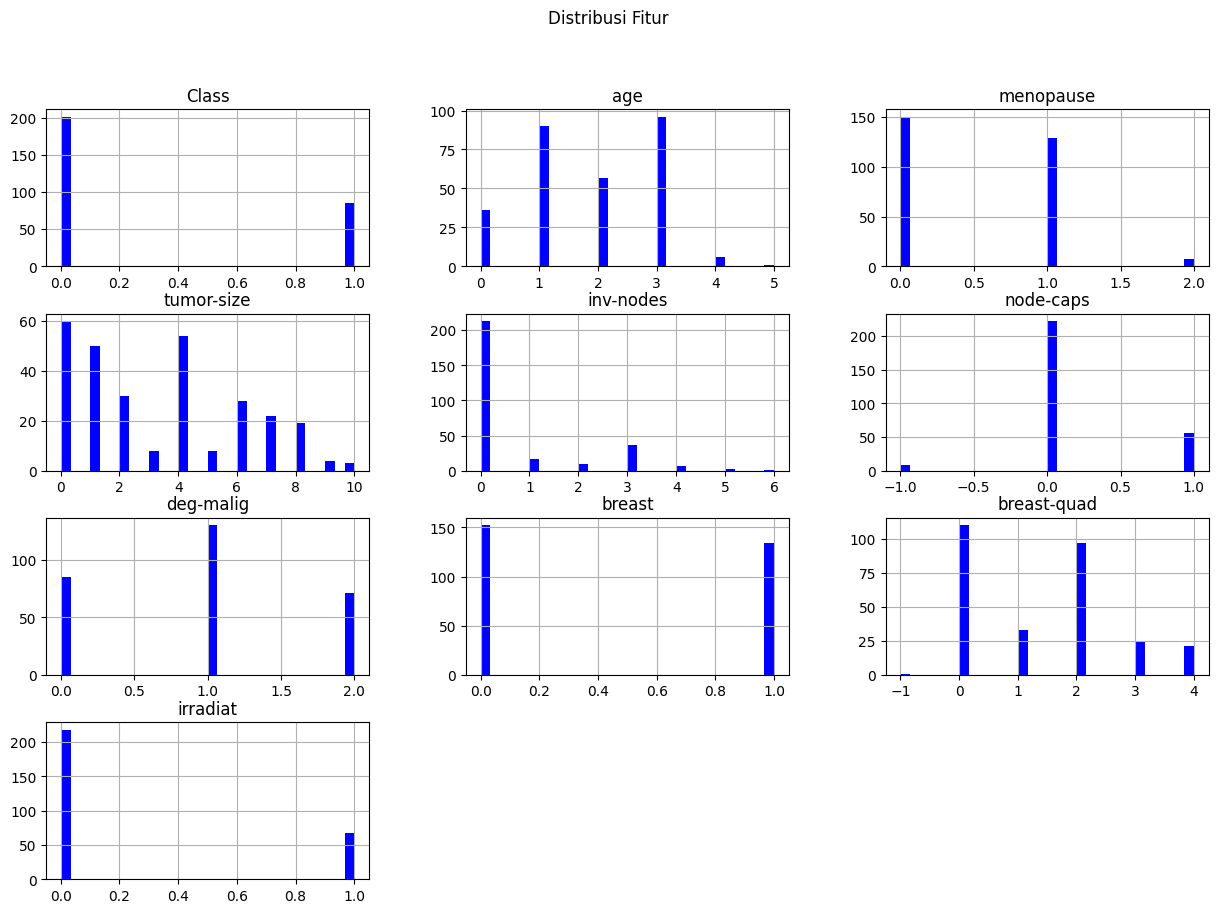

In [14]:
import matplotlib.pyplot as plt

# Pastikan data kategorik sudah difaktorkan jika perlu
for col in data.columns:
    data[col] = pd.factorize(data[col])[0]

plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()


### Tanpa Preprocessing

In [22]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Ambil dataset Gender by Name dari UCI (ID: 591)
gender_data = fetch_ucirepo(id=591)

# Ambil data sebagai DataFrame
data = gender_data.data.original

# Tampilkan 20 baris pertama sebelum preprocessing
print("Sebelum Preprocessing:")
print(data.head(20))

Sebelum Preprocessing:
           Name Gender    Count  Probability
0         James      M  5304407     0.014517
1          John      M  5260831     0.014398
2        Robert      M  4970386     0.013603
3       Michael      M  4579950     0.012534
4       William      M  4226608     0.011567
5          Mary      F  4169663     0.011411
6         David      M  3787547     0.010366
7        Joseph      M  2695970     0.007378
8       Richard      M  2638187     0.007220
9       Charles      M  2433540     0.006660
10       Thomas      M  2381034     0.006516
11  Christopher      M  2196198     0.006010
12       Daniel      M  2039641     0.005582
13      Matthew      M  1738699     0.004758
14    Elizabeth      F  1704140     0.004664
15     Patricia      F  1608260     0.004401
16     Jennifer      F  1584426     0.004336
17      Anthony      M  1506437     0.004123
18       George      M  1495736     0.004093
19        Linda      F  1480592     0.004052


### Prepocessing Data

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo

# Ambil dataset Breast Cancer (Original) ID: 14
bc_data = fetch_ucirepo(id=14)
data = bc_data.data.original

# ---------------- PREPROCESSING ---------------- #

# 1. Ganti '?' dengan NaN dan hapus baris yang mengandung missing value
data = data.replace('?', pd.NA)
data = data.dropna()

# 2. Encode semua kolom kategorik jadi angka (termasuk label/target)
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Simpan encoder jika nanti ingin decoding

# 3. Pisahkan fitur dan label
X = data.drop('Class', axis=1)  # Fitur
y = data['Class']               # Label (sudah terencode numerik)

# 4. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Modeling Klasifikasi

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from ucimlrepo import fetch_ucirepo

# 1. Ambil dataset dari UCI (ID: 14 -> Breast Cancer)
bc_data = fetch_ucirepo(id=14)
data = bc_data.data.original

# ---------------- PREPROCESSING ---------------- #

# Ganti '?' dengan NaN dan hapus baris kosong
data = data.replace('?', pd.NA)
data = data.dropna()

# Label encoding semua kolom kategorik
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Pisahkan fitur dan label
X = data.drop('Class', axis=1)
y = data['Class']

# Tidak pakai normalisasi karena MultinomialNB tidak cocok untuk data negatif
# Jadi kita tidak scaling pakai StandardScaler di sini

# ---------------- MODELING ---------------- #

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("=== Akurasi ===")
print(accuracy_score(y_test, y_pred))

print("\n=== Classification Report ===")
# Ambil kembali nama aslinya (no-recurrence-events, recurrence-events)
class_labels = label_encoders['Class'].classes_ if 'Class' in label_encoders else ['0', '1']
print(classification_report(y_test, y_pred, target_names=class_labels))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


=== Akurasi ===
0.7142857142857143

=== Classification Report ===
                      precision    recall  f1-score   support

no-recurrence-events       0.73      0.89      0.80        37
   recurrence-events       0.64      0.37      0.47        19

            accuracy                           0.71        56
           macro avg       0.68      0.63      0.64        56
        weighted avg       0.70      0.71      0.69        56


=== Confusion Matrix ===
[[33  4]
 [12  7]]


### Eavaluasi

Accuracy: 0.7143

Classification Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.73      0.89      0.80        37
   recurrence-events       0.64      0.37      0.47        19

            accuracy                           0.71        56
           macro avg       0.68      0.63      0.64        56
        weighted avg       0.70      0.71      0.69        56



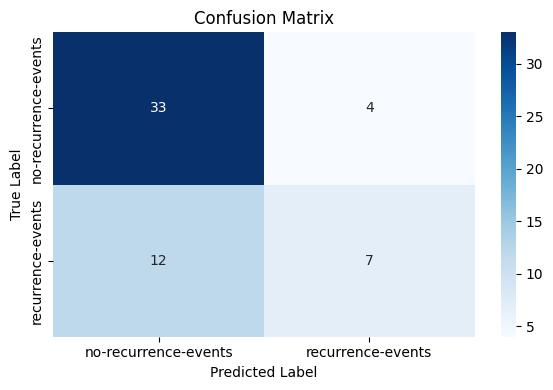

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# 2. Classification report
# Gunakan kembali nama label asli jika tersedia
target_names = label_encoders['Class'].classes_ if 'Class' in label_encoders else ['no-recurrence-events', 'recurrence-events']

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
